# Resizing images to fix sizes

## Examining the size distributions

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
from collections import Counter
from pathlib import Path
from IPython.display import clear_output
import random

data_path = '/home/szelesteya/projects/EMBED_Open_Data/'
image_root_path = '/media/szelesteya/F824D4D024D492CC/EMBED-images/'
image_training_path = image_root_path + 'training/'
image_negative_path = image_root_path + 'negative'
image_positive_path = image_root_path + 'positive'
tables_path = data_path + 'tables/'

df_pos = pd.read_csv(data_path + 'positive_empirical_png.csv')
df_neg = pd.read_csv(data_path + 'negative_empirical_png.csv')

fix_resolution = [4096, 3328]
fix_crop_image = [700, 700]

### Functions to extract information about the size

In [23]:
def parse_ROI(roi_coords_row):
    roi_coords_array = roi_coords_row[2:-1].split('(')
    roi_rects = []
    
    for i in range(len(roi_coords_array)):
        roi_coords_str = roi_coords_array[i].split(')')[0].replace(" ","").split(',')
        if "" not in roi_coords_str:
            try:
                roi_coords = [eval(j.replace('[', '').replace(']','')) for j in roi_coords_str]
    
                x_min = roi_coords[1]
                y_min = roi_coords[0]
                x_max = roi_coords[3]
                y_max = roi_coords[2]
                
                roi_rects.append([x_min, y_min, x_max, y_max])
            except SyntaxError:
                print(roi_coords_str)

    return roi_rects

def get_sizes_of_ROI(roi_coords_array):
    sizes = []

    for roi in roi_coords_array:
        size_str = f'{roi[2]-roi[0]} x {roi[3] - roi[1]}'
        height = roi[2] - roi[0]
        width = roi[3] - roi[1]
        full_resolution = height * width
        diameter = math.sqrt(height ** 2 + width ** 2)
        sizes.append([size_str,[height, width], height * width, diameter])

    return sizes

def get_size_of_image(image_path):
    image = Image.open(image_path)
    image_array = np.array(image)
    height = image_array.shape[0]
    width = image_array.shape[1]
    full_resolution = height * width
    diameter = math.sqrt( height ** 2 + width ** 2)
    dark_area = np.sum(image_array == 0)
    return [f'{height} x {width}', [height, width], full_resolution, diameter, dark_area]

### Looping through the images and store data

In [24]:
diameters_for_ROI = []
diameters_for_image = []
ratio_of_ROI = []
ratio_of_dark = []

for i in range(len(df_pos)):
    if i % 10 == 0:
        print(f'{i + 1}/{len(df_pos)}')
    roi_coords_str = df_pos.loc[i,'ROI_coords']
    png_image_path = df_pos.loc[i, 'png_path']
    image_size = get_size_of_image(png_image_path)
    roi_coords = get_sizes_of_ROI(parse_ROI(roi_coords_str))
    
    for sizes_tuple in roi_coords:
        diameter = sizes_tuple[3]
        diameters_for_ROI.append(diameter)

for i in range(len(df_neg)):
    if i % 10 == 0:
        print(f'{i+1}/{len(df_neg)}')
    png_image_path = df_neg.loc[i, 'png_path'] 
    image_size = get_size_of_image(png_image_path)
    diameters_for_image.append(image_size[3])

df_pos_img_sizes = pd.DataFrame([diameters_for_ROI, diameters_for_image, ratio_of_ROI, ratio_of_dark])

1/161
11/161
21/161
31/161
41/161
51/161
61/161
71/161
81/161
91/161
101/161
111/161
121/161
131/161
141/161
151/161
161/161
1/1012
11/1012
21/1012
31/1012
41/1012
51/1012
61/1012
71/1012
81/1012
91/1012
101/1012
111/1012
121/1012
131/1012
141/1012
151/1012
161/1012
171/1012
181/1012
191/1012
201/1012
211/1012
221/1012
231/1012
241/1012
251/1012
261/1012
271/1012
281/1012
291/1012
301/1012
311/1012
321/1012
331/1012
341/1012
351/1012
361/1012
371/1012
381/1012
391/1012
401/1012
411/1012
421/1012
431/1012
441/1012
451/1012
461/1012
471/1012
481/1012
491/1012
501/1012
511/1012
521/1012
531/1012
541/1012
551/1012
561/1012
571/1012
581/1012
591/1012
601/1012
611/1012
621/1012
631/1012
641/1012
651/1012
661/1012
671/1012
681/1012
691/1012
701/1012
711/1012
721/1012
731/1012
741/1012
751/1012
761/1012
771/1012
781/1012
791/1012
801/1012
811/1012
821/1012
831/1012
841/1012
851/1012
861/1012
871/1012
881/1012
891/1012
901/1012
911/1012


FileNotFoundError: [Errno 2] No such file or directory: '/media/szelesteya/F824D4D024D492CC/EMBED-images/negative/36674096_neg_conv.png'

### Showcasing the extracted data on histogram

In [5]:
def show_roi_hist(roi_sizes_tuples, image_size_tuples=None):
    ratios_of_ROI = []
    diameters_of_ROI = []
    
    for i, row in enumerate(roi_sizes_tuples):
        if image_size_tuples is not None: 
            image_size_tuple = eval(image_size_tuples[i])
            image_size = image_size_tuple[2]
        else:
            image_size = fix_resolution[0] * fix_resolution[1]
            
        roi_size_tuples = eval(row)
        ratios = []
    
        for roi_tuple in roi_size_tuples:
            ratio = roi_tuple[2] / image_size 
            diameter = roi_tuple[3]
            ratios.append(ratio)
            ratios_of_ROI.append(ratio)
            diameters_of_ROI.append(diameter)
    
        calc_findings.loc[i, 'ratios'] = str(ratios)

    plt.hist(ratios_of_ROI)
    plt.title('Ratios of each ROI bounding rectangle to the whole image')
    plt.savefig('ratio_of_roi')
    plt.show()

    plt.hist(diameters_of_ROI, bins = 30)
    plt.title('Diameters of each bounding rectangle')
    plt.savefig('diameter_of_roi')
    plt.show()

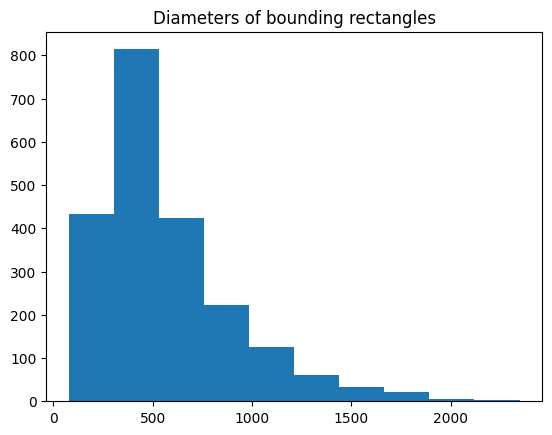

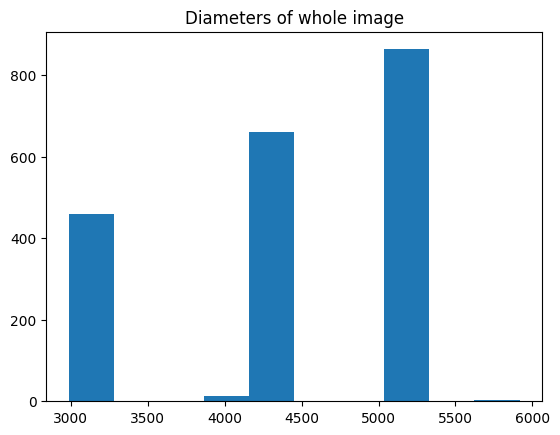

In [16]:
plt.hist(diameters_for_ROI)
plt.title('Diameters of bounding rectangles')
plt.savefig('diameters_of_ROI')
plt.show()

plt.hist(diameters_for_image)
plt.title('Diameters of whole image')
plt.savefig('diameters_of_image')
plt.show()

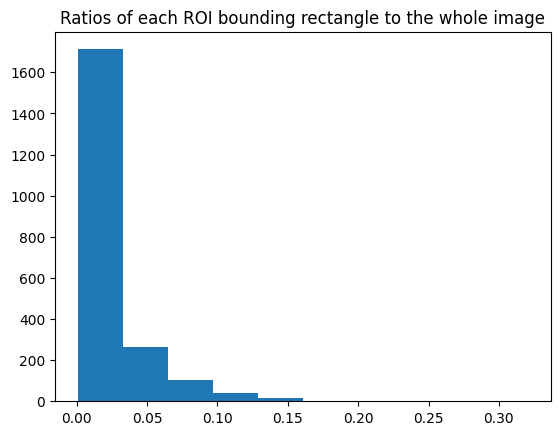

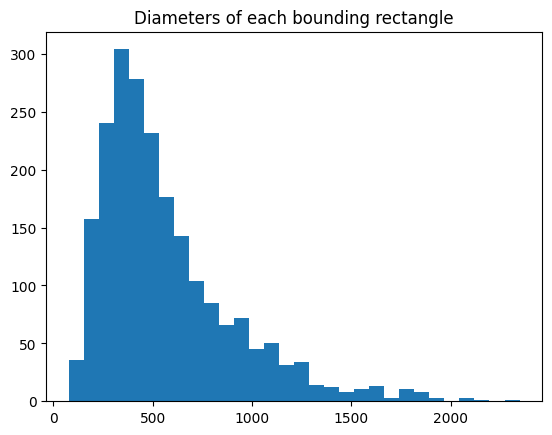

In [17]:
show_roi_hist(calc_findings['roi_size_tuples'], calc_findings['image_size_tuple'])

### Calculate the ratio of height and wight then and compare the results

In [25]:
# Concatanating the positive and negative sets
all_samples = pd.concat([negative_samples, calc_findings], axis=0)

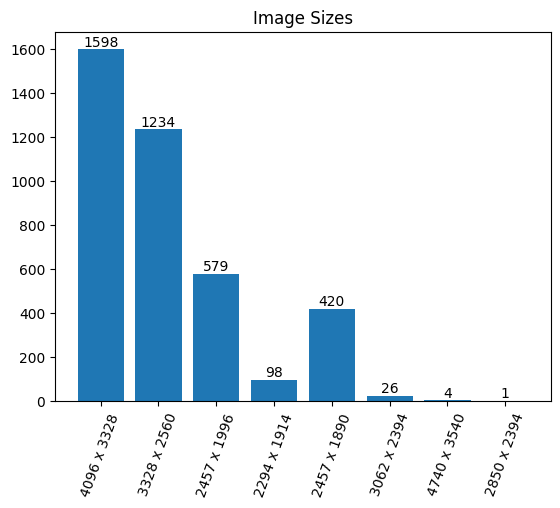

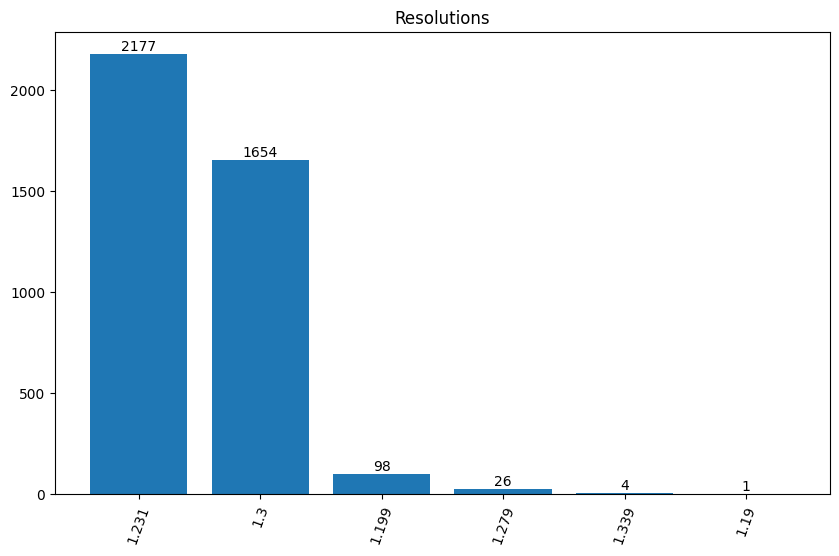

In [26]:
image_sizes_str = [ eval(tuple)[0] for tuple in all_sample['image_size_tuple'] ]
sizes_counted = Counter(image_sizes_str)
sizes = pd.Series(sizes_counted).reset_index()
sizes.columns = ['Image Size', 'Frequency']

resolutions = pd.Series(Counter([ round(eval(tuple)[1][0] / eval(tuple)[1][1], 3) for tuple in all_samples['image_size_tuple'] ])).reset_index()
resolutions.columns = ['Resolution', 'Frequency']
# print(resolutions)
# sizes = sizes.merge(resolutions_counted, on='Frequency')

plt.bar(sizes['Image Size'], sizes['Frequency'])
for i, size in sizes.iterrows():
    plt.text(i, size['Frequency'] + 1, str(size['Frequency']), ha='center', va='bottom')
plt.title('Image Sizes')
plt.xticks(rotation=70)
plt.savefig('sizes')
plt.show()

plt.figure(figsize=(10,6))
plt.bar([str(res) for res in resolutions['Resolution']], resolutions['Frequency'])
for i, resolution in resolutions.iterrows():
    plt.text(i, resolution['Frequency'] + 1, str(resolution['Frequency'].astype(int)), ha='center', va='bottom')
plt.title('Resolutions')
plt.xticks(rotation=70)
plt.savefig('resolutions')
plt.show()

### Agreeing at fixed resolution of 3328 * 4096 and resizing images

In [27]:
fix_resolution = [600, 800]

In [28]:
def resize_calc(i):
    image_path = image_resized_path + f'/{i}_pos.png'
    
    if not Path(image_path).exists():
        df_row = calc_findings.loc[i]
        png_path = df_row['full_png_path']
        size_tuple = eval(df_row['image_size_tuple'])
        original_size = size_tuple[1]
        width_distortion = float(fix_resolution[0]) / float(original_size[0])
        height_distortion = float(fix_resolution[1]) / float(original_size[1])
        
        roi_coords = parse_ROI(df_row['ROI_coords'])
        resized_roi_coords = []
    
        for j, roi_coords in enumerate(roi_coords):
            new_x_min = round(float(roi_coords[0]) * width_distortion)
            new_x_max = round(float(roi_coords[2]) * width_distortion)
            new_y_min = round(float(roi_coords[1]) * height_distortion)
            new_y_max = round(float(roi_coords[3]) * height_distortion)
    
            resized_roi_coords.append([new_x_min, new_y_min, new_x_max, new_y_max])
    
        image = Image.open(png_path)
        resized_image = image.resize(fix_resolution)
        resized_image.save(image_path, 'PNG')
    
        calc_findings.loc[i,'resized_roi_coords'] = str(resized_roi_coords)
        calc_findings.loc[i,'resized_roi_sizes'] = str(get_sizes_of_ROI(resized_roi_coords))
        calc_findings.loc[i,'resized_path'] = image_path

def resize_negative(i):
    image_path = image_resized_path + f'/{i}_neg.png'
    
    if not Path(image_path).exists():
        df_row = negative_samples.loc[i]
        png_path = df_row['full_png_path']
        size_tuple = eval(df_row['image_size_tuple'])
        original_size = size_tuple[1]
        wheightidth_distortion = float(fix_resolution[0]) / float(original_size[0])
        width_distortion = float(fix_resolution[1]) / float(original_size[1])
    
        image = Image.open(png_path)
        resized_image = image.resize(fix_resolution)
        resized_image.save(image_path, 'PNG')
        
        negative_samples.loc[i,'resized_path'] = image_path    

In [29]:
calc_length = len(calc_findings)
negative_length = len(negative_samples)
negative_samples.reset_index()

for i in range(calc_length):
    if i % 10 == 0:
        clear_output(wait=True)
        print(f'Resizing progression for calc_findings {i+1} / {calc_length}')
        
    resize_calc(i)

# for i in range(negative_length):
#     if i % 10 == 0:
#         clear_output(wait=True)
#         print(f'Resizing progression for negative pictures {i+1} / {negative_length}')
        
#     resize_negative(i)

clear_output(wait=True)
print('Done')

Resizing progression for calc_findings 1961 / 1961


KeyError: 1960

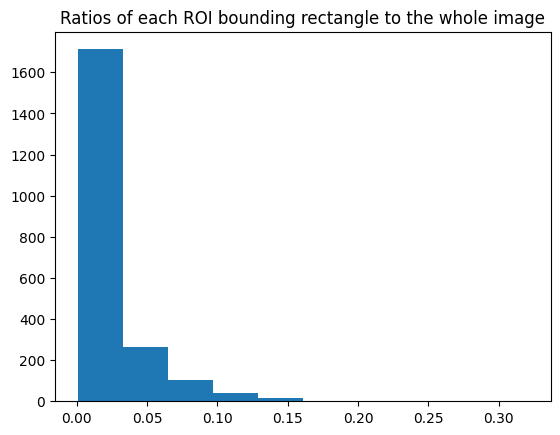

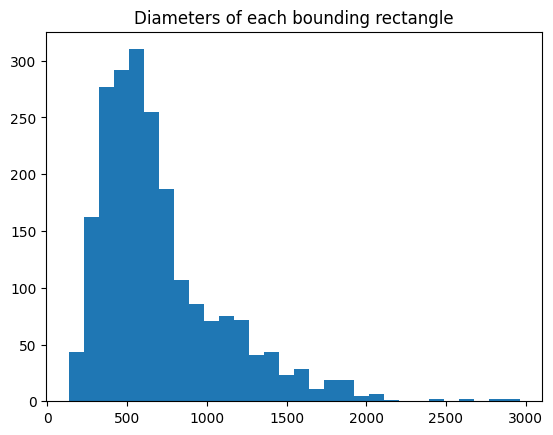

In [101]:
show_roi_hist(calc_findings['resized_roi_sizes'])

In [90]:
# Keep only empirical informations
pos_empi =  calc_findings[['empi_anon',
                           'acc_anon',
                           'ImageLateralityFinal',
                           'calcfind',
                           'calcdistri',
                           'age_at_study',
                           'ETHNICITY_DESC',
                           'resized_roi_coords',
                           'resized_path',
                           'path_severity']]

In [91]:
# Dropping values so we only have 1 image per patient
pos_empi_unique = pos_empi.sort_values(by=['age_at_study'],ascending=False).drop_duplicates(subset=['empi_anon'], keep='first').sample(frac=1).rename(columns={'ImageLateralityFinal':'side',
                                                                                                                                                              'ETHNICITY_DESC':'eth_desc'})

In [92]:
data = pd.read_csv(data_path + '/tables/EMBED_OpenData_clinical_reduced.csv')

pos_empi_unique = pos_empi_unique.merge(data, how='left', on=['empi_anon', 'acc_anon', 'side', 'age_at_study'], validate='1:m')

/tmp/ipykernel_109157/1629500443.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path + '/tables/EMBED_OpenData_clinical_reduced.csv')


In [106]:
pos_empi_unique = pos_empi_unique.sort_values(by=['study_date_anon'], ascending=False).drop_duplicates(subset=['empi_anon'], keep='first').sample(frac=1)

pos_empi_unique_reduced = pos_empi_unique[['empi_anon',
                                   'acc_anon',
                                   'side',
                                   'calcfind',
                                   'calcdistri',
                                   'asses',
                                   'age_at_study',
                                   'eth_desc',
                                   'resized_roi_coords',
                                   'resized_path']]

with open(data_path + 'pos_empi_reduced.csv', 'w') as f:
    pos_empi_unique_reduced.to_csv(f, index=False)    


pos_empi_unique_reduced

,empi_anon,acc_anon,side,calcfind,calcdistri,asses,age_at_study,eth_desc,resized_roi_coords,resized_path
657,51702243.0,5.555341e+15,L,G,NaN,A,51.264571,African American or Black,"[[356, 356, 443, 464]]",/media/szelesteya/F824D4D024D492CC/EMBED-image...
163,25456052.0,2.173009e+15,L,G,NaN,A,67.856287,African American or Black,"[[45, 274, 67, 328]]",/media/szelesteya/F824D4D024D492CC/EMBED-image...
29,94067888.0,9.773585e+15,L,I,G,S,46.300745,Asian,"[[43, 349, 84, 416]]",/media/szelesteya/F824D4D024D492CC/EMBED-image...
117,42055087.0,6.278425e+15,R,G,L,A,58.292778,"Unknown, Unavailable or Unreported","[[153, 569, 203, 643], [149, 564, 205, 640]]",/media/szelesteya/F824D4D024D492CC/EMBED-image...
21,41216370.0,9.987717e+15,R,G,NaN,A,50.517122,Caucasian or White,"[[133, 424, 180, 535]]",/media/szelesteya/F824D4D024D492CC/EMBED-image...
...,...,...,...,...,...,...,...,...,...,...
689,91758166.0,4.836439e+15,L,G,L,A,63.585152,African American or Black,"[[14, 532, 62, 592]]",/media/szelesteya/F824D4D024D492CC/EMBED-image...
476,99872093.0,3.791707e+15,R,G,NaN,A,53.290622,African American or Black,"[[49, 280, 103, 378]]",/media/szelesteya/F824D4D024D492CC/EMBED-image...
549,71643721.0,7.674417e+15,R,G,NaN,A,51.272785,Caucasian or White,"[[0, 184, 90, 356]]",/media/szelesteya/F824D4D024D492CC/EMBED-image...
587,51268311.0,9.096898e+15,L,G,NaN,A,41.320493,African American or Black,"[[70, 661, 116, 740]]",/media/szelesteya/F824D4D024D492CC/EMBED-image...


In [67]:
with open(data_path + 'empi_pos.csv', 'w') as f:
    pos_empi_unique.to_csv(f)

### Cropping images with same size

In [8]:
croped_image_path = image_root_path + ''

croped_image_size = [700,700]

In [9]:
def crop_positive_image(i):
    calc_finding_row = calc_findings.loc[i]
    image_array = np.array(Image.open(calc_finding_row['resized_path']))
    roi_coords = eval(calc_finding_row['resized_roi_coords'])
    croped_path_root = image_root_path + 'croped/'
    crop_coords = []
    crop_paths = []
    
    for j, roi_coord in enumerate(roi_coords):
        x_min = roi_coord[0]
        y_min = roi_coord[1]
        x_max = roi_coord[2]
        y_max = roi_coord[3]

        x_center = round((x_min + x_max) / 2)
        y_center = round((y_min + y_max) / 2)

        croped_height = croped_image_size[0]
        croped_width = croped_image_size[1]

        x_offset = random.randint(-round(croped_width / 8), round(croped_width / 8))
        y_offset = random.randint(-round(croped_height / 8), round(croped_height / 8))

        x_crop = x_center - round(croped_width / 2) + x_offset
        y_crop = y_center - round(croped_height / 2) + y_offset
        
        
        if x_crop < 0:
            x_crop = 0
        elif x_crop + croped_width > fix_resolution[1]:
            x_crop = fix_resolution[1] - croped_width - 1

        if y_crop < 0:
            y_crop = 0
        elif y_crop + croped_height > fix_resolution[0]:
            y_crop = fix_resolution[0] - croped_height - 1

        crop_coords.append([y_crop, x_crop])
        path = f'{croped_path_root}pos_{i}_{j}.png'
        crop_paths.append(path)

        roi_array = image_array[y_crop:(y_crop + croped_height),x_crop:(x_crop + croped_width)]
        plt.imshow(roi_array, cmap='grey')
        plt.axis('off')
        plt.savefig(path)


    calc_findings.loc[i,'crop_coords'] = str(crop_coords)
    calc_findings.loc[i,'crop_paths'] = str(crop_paths)

In [33]:
def crop_negative_image(i):
    negative_sample_row = negative_samples.loc[i]
    # print(negative_sample_row['resized_path'])
    image_array = np.array(Image.open(negative_sample_row['resized_path']))
    croped_path_root = image_root_path + 'croped/'

    crop_coords = []
    crop_paths = []

    croped_image_height = croped_image_size[0]
    croped_image_width = croped_image_size[1]
    try_treshold = 0
    
    # Cropping 2 pictures per screening
    for j in range(2):        
        crop_succesful = False
        
        while not crop_succesful:
            # Generating random offset for the crop until the picture contains mostly tissues
            x_offset = random.randint(0, fix_resolution[1] - croped_image_width - 1)
            start_y = round(fix_resolution[0] / 2) * (j)
            end_y = round(fix_resolution[0] / 2) * (j + 1) - croped_image_height - 1
            y_offset = random.randint(start_y, end_y)

            crop_array = image_array[y_offset:croped_image_height,x_offset:croped_image_width]
            crop_tissue = crop_array[crop_array > 0]
            tissue_percentage = (np.sum(crop_tissue) / (croped_image_width * croped_image_height)) * 100

            if tissue_percentage > 10:
                crop_succesful = True
                crop_coords.append([y_offset, x_offset])
                
                # Get image array of croping
                crop = image_array[y_offset:(y_offset + croped_image_height),x_offset:(x_offset + croped_image_width)]
                print([y_offset, x_offset])

                path = f'{croped_path_root}neg_{i}_{j}.png'
                crop_paths.append(path)
                plt.imshow(crop, cmap='grey')
                plt.axis('off')
                plt.savefig(path)
                plt.show()
                
                continue
                
            if try_treshold > 10:
                crop_succesful = True
                print(f'{start_y} {end_y} {y_offset}')
                continue
            try_treshold += 1

    negative_samples.loc[i, 'crop_coords'] = str(crop_coords)
    negative_samples.loc[i, 'crop_paths'] = str(crop_paths)

[599, 346]


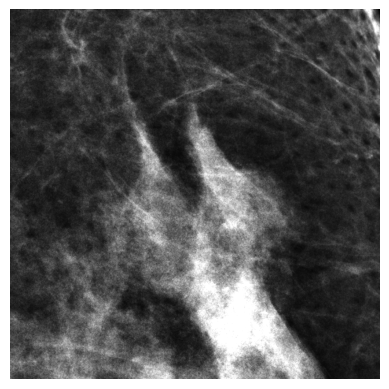

1664 2627 2323


In [38]:
crop_negative_image(1893)
#print(negative_samples.loc[0])

In [40]:
print(( 4096 * 3328) / (700 * 700))

27.819363265306123


## Saving modified dataset

In [ ]:
all_samples = pd.concat([negative_sample, calc_findings], axis=0)

with open(data_path + 'calc_findings_full.csv', 'w') as f:
    calc_findings.to_csv(f)

with open(data_path + 'negative_full.csv', 'w') as f:
    negative_sample.to_csv(f)

with open(data_path + 'all_sample_full.csv', 'w') as f:
    all_sample.to_csv(f)